In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import json
from sklearn.utils import Bunch

piloten nutzbar ab pilot 5

In [2]:
import warnings
warnings.filterwarnings('ignore')

## making of and toying with synthetic data

In [28]:
data = pd.DataFrame()
data2 = pd.DataFrame()

In [35]:

x = np.linspace(0, 500, 501)
data['y'] = np.sin(x/100)
data['x'] = x
data['z'] = -4*x

data2['y'] = np.sin(x/100 + np.pi)
data2['x'] = x
data2['z'] = -4*x

mean = (data + data2)/2

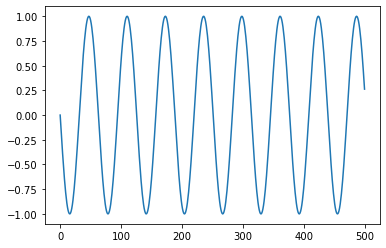

In [26]:
plt.plot(np.sin(x/10 + np.pi))


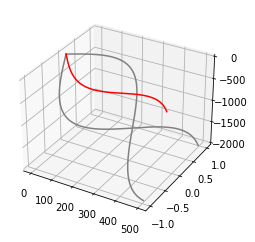

In [109]:
#plt.plot(np.sin(x/10))
#plt.plot(data['z'])

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(data.x, data.y, data.z, 'gray')
ax.plot3D(data2.x, data2.y, data2.z, 'gray')
ax.plot3D(mean.x, mean.y, mean.z, 'red')

# Data for three-dimensional scattered points
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


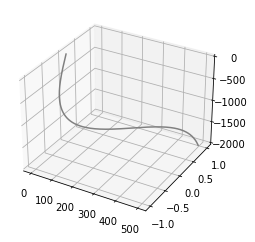

In [169]:

data = pd.DataFrame()
data2 = pd.DataFrame()

x1 = np.linspace(0, 500, 500)
data['y'] = np.sin(x/100)
data['x'] = x
data['z'] = -4*x

x2 = np.linspace(0, 500, 200)

data2['y'] = np.sin(x2/100 + np.pi)
data2['x'] = x2
data2['z'] = -4*x2

x3 = np.linspace([0,0,0], [500,500,500], 200)

#f = interp1d(x1, data2, axis= 0)
new = f(x1)
#mean = (data + data2)/2
#mean.shape
interpol_df = pd.DataFrame()
for column in "xyz":
    f = interp1d(x2, data2[column], kind = 'cubic')
    interpol_df[column] = f(x1)

interpol_df

ax = plt.axes(projection='3d')

ax.plot3D(interpol_df.x, interpol_df.y, interpol_df.z, 'gray')
#ax.plot3D(interpol_df.x, data2_.y, data2_.z, 'gray')

## functions for mean trajectory and std of a trajectory

In [3]:
# calc mean trajectory
def mean_trajectory(trajectories):
    "trajectories is iterable of trajectories as pd.dfs"
    
    # assert that inputs have same shape
    #assert 
    
    mean = np.zeros(trajectories[0].shape)
    
    for trajectory in trajectories:
        
        mean += trajectory
        
    mean = mean/len(trajectories)
    
    return mean

# test 
#trajectories = [data, data2]
#mean = mean_trajectory(trajectories)


In [4]:
# calc standard deviation/variance
def std_trajectory(trajectories, mode = 'total'):
    """
    trajectories is iterable of 3D trajectories as pd.dfs
    mode can be one of total, dimwise, pointwise
    """
    
    # assert that inputs have same shape
    #assert 
    
    stack = np.zeros((len(trajectories), trajectories[0].shape[0], trajectories[0].shape[1])) 
    
    for i in range(len(trajectories)):
        
        stack[i] = trajectories[i]
        
    #mean = mean/len(trajectories)
    
    modes = {'pointwise':2, 'dimwise':1, 'total': None}
    
    std = np.std(stack, axis = modes[mode])
    
    return std#stack

# test      
#stack = std_trajectory(trajectories)

#ax = plt.axes(projection='3d')

# Data for a three-dimensional line
#ax.plot3D(stack[0,:,1], stack[0,:,0], stack[0,:,2], 'gray')
#ax.plot3D(stack[1,:,1], stack[1,:,0], stack[1,:,2], 'gray')

## Real data

In [ ]:
## prepro

# get & clean coi

# split into trials

# remove first 6 rows of each trial

## analysis

# group trials: 
# blocks 1-4: 2 groups a 15
# blocks 5-8: 3 groups a 10

# interpolate trials

# calculate std in time

# calculate std in space

# plot

split blocks in pilot8
start/dest shelves vary across blocks

block 1: all equal except rack: 2/3 (21 / 9)
block 2: same, but occlusion 30 (22 / 8)
block 3: same, but occlusion 20 (18 / 12)
block 4: same, but occlusion 25 (19 / 11)

block 5: no occlusion, type D occurs, 3 perm: 1-3 right, 2-2 none, 3-2 left, coding according to cube placement (12 / 9 / 9)
block 6: same, but occlusion 30 (8 / 9 / 13)
block 7: same, but occlusion 20 (9 / 9 / 12)
block 8: same, but occlusion 25 (11 / 13 / 6)

pilot7

b1: 3 - 1, 2 - 2, 1 - 3 
b2: same, occ 25
b3: same, occ 30
b4: same, occ 20

b5: 1 - 1, 2 - 3, 3 - 1
b6: same, occ 25
b7: same, occ 30
b8: same, occ 20

21 9
22 8
18 12
19 11

12 9 9
8 9 13
9 9 12
11 13 6

In [31]:
import os
import importlib
import fnmatch

# load data
root = 'C:/Users/xaver/Desktop/wng-data-analysis/'
#os.chdir("/home/xavfun/repos/notebooks/pilot8/")

vp_name = 'pilot8'

root = 'C:/Users/xaver/Desktop/wng-data-analysis/' + vp_name

os.chdir(root)

block1 = pd.read_csv(root+'/Pilot8_2_1_log.csv', delimiter =';')
block2 = pd.read_csv(root+'/Pilot8_2_2_log.csv', delimiter =';')
block3 = pd.read_csv(root+'/Pilot8_2_3_log.csv', delimiter =';')
block4 = pd.read_csv(root+'/Pilot8_2_4_log.csv', delimiter =';')
block5 = pd.read_csv(root+'/Pilot8_2_5_log.csv', delimiter =';')
block6 = pd.read_csv(root+'/Pilot8_2_6_log.csv', delimiter =';')
block7 = pd.read_csv(root+'/Pilot8_2_7_log.csv', delimiter =';')
block8 = pd.read_csv(root+'/Pilot8_2_8_log.csv', delimiter =';')


# block1 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_1_log.csv', delimiter =';')
# block2 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_2_log.csv', delimiter =';')
# block3 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_3_log.csv', delimiter =';')
# block4 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_4_log.csv', delimiter =';')
# block5 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_5_log.csv', delimiter =';')
# block6 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_6_log.csv', delimiter =';')
# block7 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_7_log.csv', delimiter =';')
# block8 = pd.read_csv('/home/xavfun/repos/notebooks/pilot8/Pilot8_2_8_log.csv', delimiter =';')

blocks = [block1, block2, block3, block4, block5, block6, block7, block8]

#from 'Versuchsszenario_Pilot8.py' import vardict as p8_scenario

_temp = __import__('Versuchsszenario_Pilot8', globals(), locals(), ['vardict'], 0)
p8_scenario = _temp.vardict

p8_scenario

{'Block1': {'ShelfDef': {'ShelfA': {'Direction': 'W',
    'Position': [1.6, 0.0, 0.0]},
   'ShelfB': {'Direction': 'S', 'Position': [0.0, 0.0, 1.6]},
   'ShelfC': {'Direction': 'O', 'Position': [-1.6, 0.0, 0.0]},
   'ShelfD': {'Direction': 'N', 'Position': [0.0, 0.0, -1.6]}},
  'Time': 'No',
  'Trials': {'1': {'Cube': {'Destination': 'ShelfB',
     'Placement': 3,
     'Rack': 2,
     'Start': 'ShelfC'},
    'Effect': 'ALWAYSVISIBLE',
    'Effectvalue': 0,
    'Sensorsize': 0.66,
    'Startplane': [0.0, 0.0],
    'Type': 'C',
    'TypeDirection': 'None'},
   '2': {'Cube': {'Destination': 'ShelfB',
     'Placement': 3,
     'Rack': 2,
     'Start': 'ShelfC'},
    'Effect': 'ALWAYSVISIBLE',
    'Effectvalue': 0,
    'Sensorsize': 0.66,
    'Startplane': [0.0, 0.0],
    'Type': 'C',
    'TypeDirection': 'None'},
   '3': {'Cube': {'Destination': 'ShelfB',
     'Placement': 3,
     'Rack': 3,
     'Start': 'ShelfC'},
    'Effect': 'ALWAYSVISIBLE',
    'Effectvalue': 0,
    'Sensorsize': 0.6

In [43]:
def data_loader(vp_name, root = 'C:/Users/xaver/Desktop/wng-data-analysis/', num_blocks = 8):
    
    """takes vp_name and root folder and returns list of blocks as dataframes and scenario dictionary"""
    
    import os
    import importlib
    import fnmatch

    
    # load data
    root = 'C:/Users/xaver/Desktop/wng-data-analysis/' + vp_name

    os.chdir(root)
    
    blocks = [pd.read_csv(file, delimiter =';') for file in os.listdir(root) if fnmatch.fnmatch(file, '*_log.csv')]

    #blocks = [block1, block2, block3, block4, block5, block6, block7, block8]

    #from 'Versuchsszenario_Pilot8.py' import vardict as p8_scenario

    _temp = __import__('Versuchsszenario_Pilot8', globals(), locals(), ['vardict'], 0)
    scenario = _temp.vardict

    return blocks, scenario

# test
data_loader('pilot7')

([        # VPN   Block   Trial  TrialType   Zeitdruck  TrailDuration  \
  0      Pilot7       1       0       None       False       0,000000   
  1      Pilot7       1       0       None       False       0,000000   
  2      Pilot7       1       0       None       False       0,000000   
  3      Pilot7       1       0       None       False       0,000000   
  4      Pilot7       1       0       None       False       0,000000   
  ...       ...     ...     ...        ...         ...            ...   
  11558  Pilot7       1       0       None       False       0,000000   
  11559  Pilot7       1       0       None       False       0,000000   
  11560  Pilot7       1       0       None       False       0,000000   
  11561  Pilot7       1       0       None       False       0,000000   
  11562  Pilot7       1       0       None       False       0,000000   
  
         Zielregal  Distance(Cube_center, Perfect_Position)  \
  0           None                                -1,00000

In [41]:
import fnmatch
os.listdir(root)

[pd.read_csv(file, delimiter =';') for file in os.listdir(root) if fnmatch.fnmatch(file, '*_log.csv')]

[          # VPN   Block   Trial  TrialType   Zeitdruck  TrailDuration  \
 0      Pilot8_2       1       0       None       False       0,000000   
 1      Pilot8_2       1       0       None       False       0,000000   
 2      Pilot8_2       1       0       None       False       0,000000   
 3      Pilot8_2       1       0       None       False       0,000000   
 4      Pilot8_2       1       0       None       False       0,000000   
 ...         ...     ...     ...        ...         ...            ...   
 12052  Pilot8_2       1       0       None       False       0,000000   
 12053  Pilot8_2       1       0       None       False       0,000000   
 12054  Pilot8_2       1       0       None       False       0,000000   
 12055  Pilot8_2       1       0       None       False       0,000000   
 12056  Pilot8_2       1       0       None       False       0,000000   
 
        Zielregal  Distance(Cube_center, Perfect_Position)  \
 0           None                               

In [24]:
for block in ['Block' + str(i) for i in range(1, 8)]:

    s = set()

    #for trial, val in  p8_scenario['Block1']['Trials'].items():
    for trial, val in  p8_scenario[block]['Trials'].items():

        #print(trial, val['Cube'])
        #print(trial, val['Cube']['Placement'], val['Cube']['Rack'])
        s.add((val['Cube']['Placement'], val['Cube']['Rack']))
    
#    for 

    print(s)
    
list(s)[0]

{(3, 2), (3, 3)}
{(3, 2), (3, 3)}
{(3, 2), (3, 3)}
{(3, 2), (3, 3)}
{(3, 2), (1, 3), (2, 2)}
{(3, 2), (1, 3), (2, 2)}
{(3, 2), (1, 3), (2, 2)}


(3, 2)

In [26]:
def get_conditions(scenario, num_blocks = 8):
    "takes a Versuchsszenario and returns the relevant conditions per block"
    
    conditions = {}
    
    for block in ['Block' + str(i) for i in range(1, num_blocks+1)]:

        s = set()

        #for trial, val in  p8_scenario['Block1']['Trials'].items():
        for trial, val in  scenario[block]['Trials'].items():

            s.add((val['Cube']['Placement'], val['Cube']['Rack']))
            
        conditions[block] = list(s)
    
    return conditions

#test

get_conditions(p8_scenario)

{'Block1': [(3, 2), (3, 3)],
 'Block2': [(3, 2), (3, 3)],
 'Block3': [(3, 2), (3, 3)],
 'Block4': [(3, 2), (3, 3)],
 'Block5': [(3, 2), (1, 3), (2, 2)],
 'Block6': [(3, 2), (1, 3), (2, 2)],
 'Block7': [(3, 2), (1, 3), (2, 2)],
 'Block8': [(3, 2), (1, 3), (2, 2)]}

In [285]:
block1.columns

# successful trials

for block in blocks:
    #print(np.unique(block[[' Trial']].iloc[np.where(block['\t\tSuccess']==True)[0]])-1)
    print(np.unique(block[' TrailDuration'].iloc[np.where(block['\t\tSuccess']==True)[0]])-1)

ValueError: could not convert string to float: '0,000000'

In [281]:
block1.columns
np.unique(block1[' TrailDuration'])

array(['0,000000', '10,187000', '10,930000', '10,961000', '11,218000',
       '12,471000', '13,192000', '13,704000', '138,301000', '14,583000',
       '14,629000', '14,805000', '15,124000', '16,494000', '17,606000',
       '17,958000', '18,315000', '19,315000', '20,004000', '20,304000',
       '21,225000', '21,603000', '21,848000', '23,001000', '23,126000',
       '27,246000', '38,519000', '7,527000', '9,144000', '9,262000',
       '92,164000'], dtype=object)

In [107]:
# group trials 1-4

block1_grouping = {trial:info['Cube']['Rack'] for trial, info in p8_scenario['Block1']['Trials'].items()}
block2_grouping = {trial:info['Cube']['Rack'] for trial, info in p8_scenario['Block2']['Trials'].items()}
block3_grouping = {trial:info['Cube']['Rack'] for trial, info in p8_scenario['Block3']['Trials'].items()}
block4_grouping = {trial:info['Cube']['Rack'] for trial, info in p8_scenario['Block4']['Trials'].items()}

block1_groups = {'rack_2':[trial for trial, rack in block1_grouping.items() if rack == 2], 'rack_3':[trial for trial, rack in block1_grouping.items() if rack == 3]}
block2_groups = {'rack_2':[trial for trial, rack in block2_grouping.items() if rack == 2], 'rack_3':[trial for trial, rack in block2_grouping.items() if rack == 3]}
block3_groups = {'rack_2':[trial for trial, rack in block3_grouping.items() if rack == 2], 'rack_3':[trial for trial, rack in block3_grouping.items() if rack == 3]}
block4_groups = {'rack_2':[trial for trial, rack in block4_grouping.items() if rack == 2], 'rack_3':[trial for trial, rack in block4_grouping.items() if rack == 3]}

for group in [block1_groups, block2_groups, block3_groups, block4_groups]:

    print(len(group['rack_2']), len(group['rack_3']))
    print(group['rack_2'], group['rack_3'])

21 9
['1', '2', '4', '5', '6', '7', '8', '11', '13', '16', '17', '18', '19', '20', '22', '23', '24', '26', '27', '29', '30'] ['3', '9', '10', '12', '14', '15', '21', '25', '28']
22 8
['2', '3', '4', '5', '7', '8', '11', '12', '15', '16', '18', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30'] ['1', '6', '9', '10', '13', '14', '17', '21']
18 12
['1', '3', '4', '5', '8', '9', '11', '13', '14', '15', '18', '19', '20', '21', '23', '25', '26', '29'] ['2', '6', '7', '10', '12', '16', '17', '22', '24', '27', '28', '30']
19 11
['1', '2', '3', '4', '6', '7', '9', '12', '13', '15', '16', '19', '20', '22', '23', '24', '25', '26', '29'] ['5', '8', '10', '11', '14', '17', '18', '21', '27', '28', '30']


In [104]:
# group trials 5-8

block5_grouping = {trial:info['Cube']['Placement'] for trial, info in p8_scenario['Block5']['Trials'].items()}
block6_grouping = {trial:info['Cube']['Placement'] for trial, info in p8_scenario['Block6']['Trials'].items()}
block7_grouping = {trial:info['Cube']['Placement'] for trial, info in p8_scenario['Block7']['Trials'].items()}
block8_grouping = {trial:info['Cube']['Placement'] for trial, info in p8_scenario['Block8']['Trials'].items()}

block5_groups = {'pla_1':[trial for trial, pla in block5_grouping.items() if pla == 1],
                 'pla_2':[trial for trial, pla in block5_grouping.items() if pla == 2],
                 'pla_3':[trial for trial, pla in block5_grouping.items() if pla == 3]}
block6_groups = {'pla_1':[trial for trial, pla in block6_grouping.items() if pla == 1],
                 'pla_2':[trial for trial, pla in block6_grouping.items() if pla == 2],
                 'pla_3':[trial for trial, pla in block6_grouping.items() if pla == 3]}
block7_groups = {'pla_1':[trial for trial, pla in block7_grouping.items() if pla == 1],
                 'pla_2':[trial for trial, pla in block7_grouping.items() if pla == 2],
                 'pla_3':[trial for trial, pla in block7_grouping.items() if pla == 3]}
block8_groups = {'pla_1':[trial for trial, pla in block8_grouping.items() if pla == 1],
                 'pla_2':[trial for trial, pla in block8_grouping.items() if pla == 2],
                 'pla_3':[trial for trial, pla in block8_grouping.items() if pla == 3]}

for group in [block5_groups, block6_groups, block7_groups, block8_groups]:
    print(len(group['pla_1']),len(group['pla_2']), len(group['pla_3']))

12 9 9
8 9 13
9 9 12
11 13 6


In [57]:
block1_coi.dtypes

x_right    float64
y_right    float64
z_right    float64
x_left     float64
y_left     float64
z_left     float64
trial        int64
type        object
time       float64
dtype: object

In [288]:
def get_coi(block, add_cois = None):
    columns = [' \t\tRighthand_x', ' Righthand_y', ' Righthand_z',
           ' \t\tLefthand_x', ' Lefthand_y', ' Lefthand_z',
           ' Trial', ' TrialType', '\t\tZeit', ' TrailDuration'
          ]

    block = block[columns]
    
    new_columns = ['x_right', 'y_right', 'z_right',
           'x_left', 'y_left', 'z_left',
           'trial', 'type', 'time', 'duration']
    
    block.columns = new_columns

    return block
    
# test
block1_coi = get_coi(block1)

In [314]:
#block1.columns
#b2 = block1[' TrailDuration'].str.replace(",", ".").astype(float)#, inplace= True)
#block1[' TrailDuration'].iloc[np.where(b2)]
#b2.iloc[np.where(b2)]
#block1[' TrailDuration'].astype(float)
#np.where(b2)

def s2f(block):
    
    for column in ['x_right', 'y_right', 'z_right',
           'x_left', 'y_left', 'z_left', 'duration']:
        
        block[column] = block[column].str.replace(",", ".").astype(float)

    return block

block_coi_float = s2f(block1_coi)

In [195]:
def trialsplit(block):
    
    trials = []
    for i in range(1, max(block.trial)):
        trial = block.iloc[np.where(block.trial ==i)][6:]  # [6:] removes leading -1s
        trials.append(trial)

    trials.append(trial)

    return trials


# test
# todo make the split to exclude unsucessful trials
block1_coi_split = trialsplit(block1_coi)#[i] for i in [ 0,  3,  4,  5,  8,  9, 13, 14, 16, 17, 18, 19, 21, 24]]
len(block1_coi_split)
#plot_trajectories(block1_coi_split)

30

In [202]:
# index trials
rack_2_idx = np.array(block1_groups['rack_2']).astype(int) - 1
rack_3_idx = np.array(block1_groups['rack_3']).astype(int) - 1

# old -> all
#rack_2_trials = [block1_coi_split[i] for i in rack_2_idx]
#rack_3_trials = [block1_coi_split[i] for i in rack_3_idx]

# todo make the split to exclude unsucessful trials

# new -> only success
rack_2_trials = [block1_coi_split[i] for i in list(set(rack_2_idx).intersection([ 0,  3,  4,  5,  8,  9, 13, 14, 16, 17, 18, 19, 21, 24]))]
rack_3_trials = [block1_coi_split[i] for i in list(set(rack_3_idx).intersection([ 0,  3,  4,  5,  8,  9, 13, 14, 16, 17, 18, 19, 21, 24]))]


In [203]:
len(rack_3_trials)

5

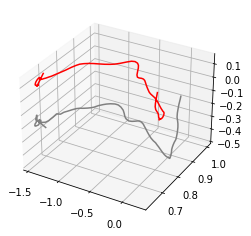

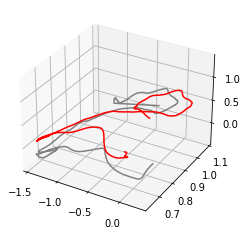

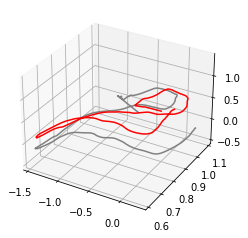

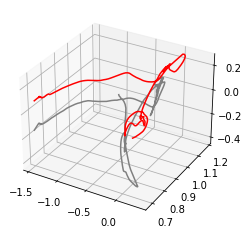

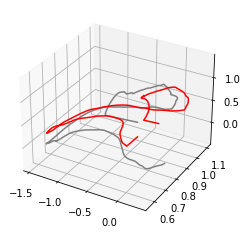

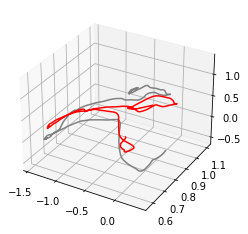

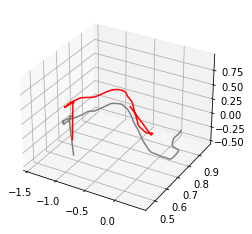

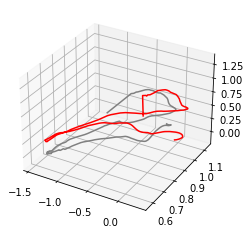

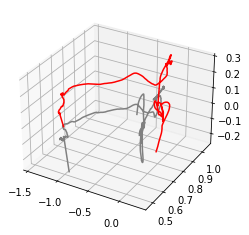

In [135]:
for trial in rack_3_trials:
    #print(len(trial))

    plt.clf()
    ax = plt.axes(projection='3d')
    
    #trial = trial[6:] 
    
    ax.plot3D(trial.x_right, trial.y_right, trial.z_right, 'gray')
    ax.plot3D(trial.x_left, trial.y_left, trial.z_left, 'red')
    plt.show()


In [155]:
def plot_trajectories(trajectories):
    for trajectory in trajectories:
        
        #print(len(trial))
        plt.clf()
        ax = plt.axes(projection='3d')

        #trial = trial[6:] 

        ax.plot3D(trajectory.x_right, trajectory.y_right, trajectory.z_right, 'gray')
        ax.plot3D(trajectory.x_left, trajectory.y_left, trajectory.z_left, 'red')
        plt.show()


In [378]:
## analyze blocks, pilot8

all_groups = [block1_groups, block2_groups, block3_groups, block4_groups, block5_groups, block6_groups, block7_groups, block8_groups]
results = Bunch()

all_trials_grouped = []
all_success_duration = []

for i, (block, groups) in enumerate(zip(blocks, all_groups)):
    ## prepro
    
    # get successful trials
    success_idx = np.unique(block[[' Trial']].iloc[np.where(block['\t\tSuccess']==True)[0]])-1
    
    # get & clean coi
    block_coi = get_coi(block)
    block_coi_float = s2f(block_coi)
    
    # variability in time
    block_success_duration = np.unique(block_coi_float['duration'])[success_idx]
    all_success_duration.append(block_success_duration)
    
    # split into trials and remove first 6 rows of each trial
    block_coi_split = trialsplit(block_coi)
  
    # group trials: 
    # blocks 1-4: 2 groups a 15
    # blocks 5-8: 3 groups a 10
        
    # index trials and remove unsuccessful ones
    if i < 4:
        
        rack_2_idx = np.array(groups['rack_2']).astype(int) - 1
        rack_3_idx = np.array(groups['rack_3']).astype(int) - 1

        #rack_2_trials = [block_coi_split[i] for i in rack_2_idx]
        #rack_3_trials = [block_coi_split[i] for i in rack_3_idx]
        
        rack_2_trials = [block_coi_split[i] for i in list(set(rack_2_idx).intersection(success_idx))]
        rack_3_trials = [block_coi_split[i] for i in list(set(rack_3_idx).intersection(success_idx))]
    
        trial_groups = [rack_2_trials, rack_3_trials]
        
    else:

        pla_1_idx = np.array(groups['pla_1']).astype(int) - 1
        pla_2_idx = np.array(groups['pla_2']).astype(int) - 1
        pla_3_idx = np.array(groups['pla_3']).astype(int) - 1

        #pla_1_trials = [block_coi_split[i] for i in pla_1_idx]
        #pla_2_trials = [block_coi_split[i] for i in pla_2_idx]
        #pla_3_trials = [block_coi_split[i] for i in pla_3_idx]
        
        pla_1_trials = [block_coi_split[i] for i in list(set(pla_1_idx).intersection(success_idx))]
        pla_2_trials = [block_coi_split[i] for i in list(set(pla_2_idx).intersection(success_idx))]
        pla_3_trials = [block_coi_split[i] for i in list(set(pla_3_idx).intersection(success_idx))]

        trial_groups = [pla_1_trials, pla_2_trials, pla_3_trials]
    
    all_trials_grouped.append(trial_groups) # for checkout here
    
 
    ## analysis
  
    """
    # interpolate trials
    for trials in trial_groups:
        
        interpolated_trials = interpolate_trajectories(trials, 1000)            
    
        # calculate std in time

        # calculate mean in space
        mean_trajectory = mean_trajectory(interpolated_trials)
        
        # calculate std in space
        std_trajectory = std_trajectory(interpolated_trials)

        # plot
        
        """

In [319]:
for block in all_success_duration:
    print(np.mean(block))

14.379785714285715
13.587928571428572
16.331111111111113
13.526399999999999
16.339823529411767
17.07123076923077
14.12657142857143
15.5962


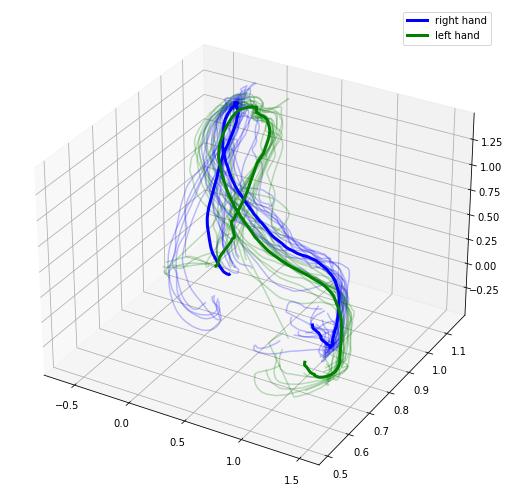

In [374]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')   
interpolated_right_trajectories = []
interpolated_left_trajectories = []


for trajectory in all_trials_grouped[1][0]:
    #plot_trajectories([traj])
            
    #print(len(trial))
    #ax = plt.axes(projection='3d')

    #trial = trial[6:] 
    trajectory = trajectory.iloc[:-5, :]

    ax.plot3D(trajectory.x_right, trajectory.y_right, trajectory.z_right, 'blue', alpha = 0.25, label  = '_nolegend_')
    ax.plot3D(trajectory.x_left, trajectory.y_left, trajectory.z_left, 'green', alpha = 0.25, label  = '_nolegend_')
    
    right = trajectory.iloc[:,:3]
    left = trajectory.iloc[:,3:6]
            
    interpolated_right, interpolated_left = interpolate_trajectories([right, left], 1000)
            
    interpolated_right_trajectories.append(interpolated_right)
    interpolated_left_trajectories.append(interpolated_left)
    

mean_traj = pd.concat([mean_trajectory(interpolated_left_trajectories), mean_trajectory(interpolated_right_trajectories)], axis = 1)

ax.plot3D(mean_traj.x_right, mean_traj.y_right, mean_traj.z_right, 'blue', linewidth = 3)#, alpha = 0.25)
ax.plot3D(mean_traj.x_left, mean_traj.y_left, mean_traj.z_left, 'green', linewidth = 3)#, alpha = 0.25
plt.legend(["right hand", "left hand"])

plt.savefig("trajectories_1.png")
plt.show()

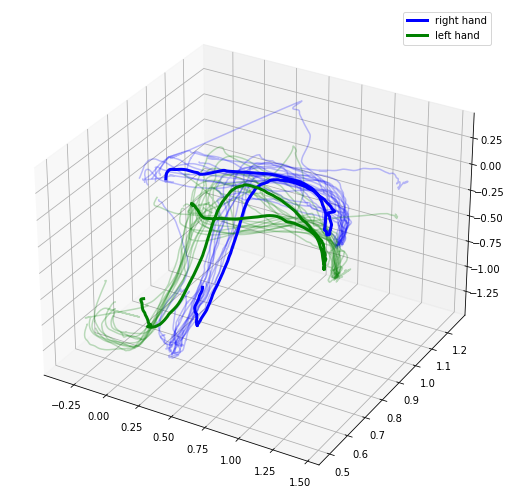

In [380]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')   
interpolated_right_trajectories = []
interpolated_left_trajectories = []

for trajectory in all_trials_grouped[3][1]:
    #plot_trajectories([traj])
            
    #print(len(trial))
    #ax = plt.axes(projection='3d')

    #trial = trial[6:] 
    trajectory = trajectory.iloc[:-5, :]
    
    #ax.plot3D(trajectory.x_right, trajectory.y_right, trajectory.z_right, 'blue', alpha = 0.25, label  = '_nolegend_')
    #ax.plot3D(trajectory.x_left, trajectory.y_left, trajectory.z_left, 'green', alpha = 0.25, label  = '_nolegend_')
    
    right = trajectory.iloc[:,:3]
    left = trajectory.iloc[:,3:6]
            
    interpolated_right, interpolated_left = interpolate_trajectories([right, left], 1000)
    
    ax.plot3D(interpolated_right.x_right, interpolated_right.y_right, interpolated_right.z_right, 'blue', alpha = 0.25, label  = '_nolegend_')
    ax.plot3D(interpolated_left.x_left, interpolated_left.y_left, interpolated_left.z_left, 'green', alpha = 0.25, label  = '_nolegend_')

    
    interpolated_right_trajectories.append(interpolated_right)
    interpolated_left_trajectories.append(interpolated_left)
    

mean_traj = pd.concat([mean_trajectory(interpolated_left_trajectories), mean_trajectory(interpolated_right_trajectories)], axis = 1)

ax.plot3D(mean_traj.x_right, mean_traj.y_right, mean_traj.z_right, 'blue', linewidth = 3)#, alpha = 0.25)
ax.plot3D(mean_traj.x_left, mean_traj.y_left, mean_traj.z_left, 'green', linewidth = 3)#, alpha = 0.25
plt.legend(["right hand", "left hand"])

plt.savefig("trajectories_2.png")
plt.show()

In [377]:
mean_traj

x_left  y_left  z_left  x_right  y_right  z_right
0       NaN     NaN     NaN      NaN      NaN      NaN
1       NaN     NaN     NaN      NaN      NaN      NaN
2       NaN     NaN     NaN      NaN      NaN      NaN
3       NaN     NaN     NaN      NaN      NaN      NaN
4       NaN     NaN     NaN      NaN      NaN      NaN
..      ...     ...     ...      ...      ...      ...
995     NaN     NaN     NaN      NaN      NaN      NaN
996     NaN     NaN     NaN      NaN      NaN      NaN
997     NaN     NaN     NaN      NaN      NaN      NaN
998     NaN     NaN     NaN      NaN      NaN      NaN
999     NaN     NaN     NaN      NaN      NaN      NaN

[1000 rows x 6 columns]

In [360]:
for block in all_trials_grouped:
    for group in block:
        print(len(group))

9
5
13
1
7
2
14
11
1
9
7
4
3
6
5
3
6
2
8
0


0.7511402168184137 0.7961485703360716


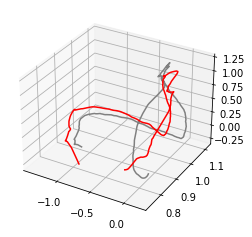

0.7486917024369849 0.7876569378472263


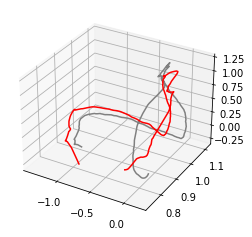

0.5882464927884515 0.583733209166369


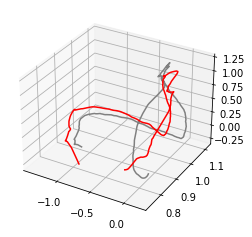

0.5412673370606178 0.5604029344955034


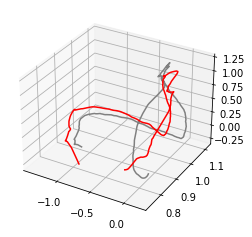

0.8037807193808577 0.8067848516512647


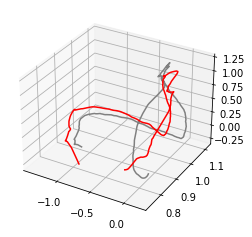

0.7913880798555158 0.7928611423067063


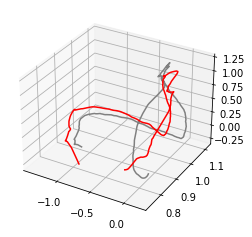

0.7308484100379743 0.695240047798679


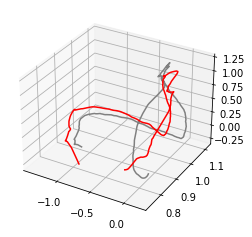

0.6797747193867602 0.6461747787684994


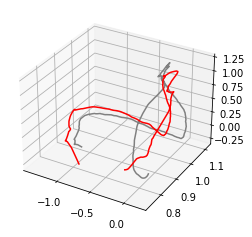

0.7755302863711181 0.7526553177179117


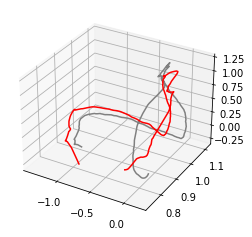

0.7939409228477039 0.7512316803010047


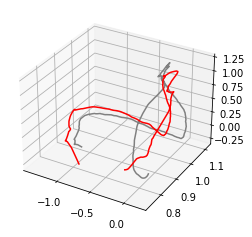

0.7396931140551843 0.6970451538281801


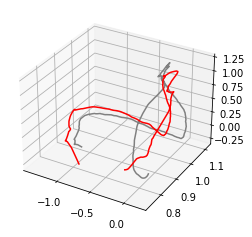

0.7323459629793211 0.7855709389275539


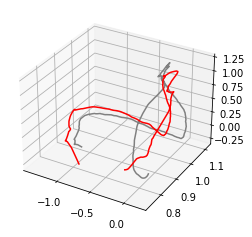

0.7570505059319397 0.8111807177900421


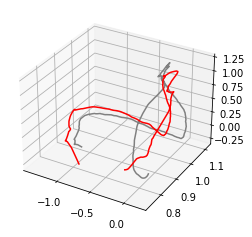

0.7635659011654916 0.8014297973480449


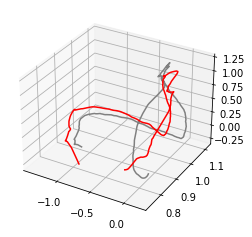

0.8294736639357154 0.8218123174942463


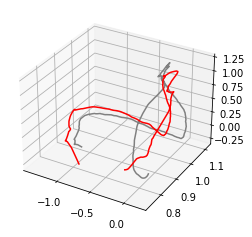

0.8204329056582121 0.8073963931294901


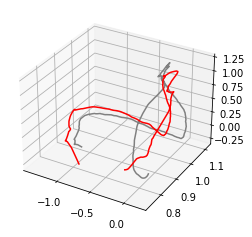

0.7736464492402311 0.7618514897989122


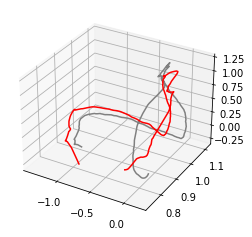

0.7490913055235939 0.7749698073334105


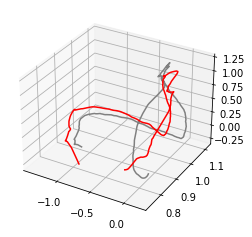

0.694835742151227 0.7276573692491856


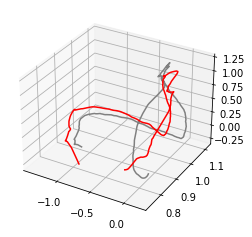

In [320]:
stds = {}
stds["no_occlusion"] = []
stds["small_occlusion"] = []
stds["medium_occlusion"] = []
stds["big_occlusion"] = []


for i, block in enumerate(all_trials_grouped):
    
    
    for j, group in enumerate(block):
        
        interpolated_left_trajectories = []
        interpolated_right_trajectories = []
        
        #print(len(group))
        
         
        for trial in group:
            
            right = trial.iloc[:,:3]
            left = trial.iloc[:,3:6]
            
            interpolated_right, interpolated_left = interpolate_trajectories([right, left], 1000)
            
            interpolated_right_trajectories.append(interpolated_right)
            interpolated_left_trajectories.append(interpolated_left)
        
        if len(group) != 0:
            std_left = std_trajectory(interpolated_left_trajectories)
            std_right = std_trajectory(interpolated_right_trajectories)
            mean_traj = pd.concat([mean_trajectory(interpolated_left_trajectories), mean_trajectory(interpolated_right_trajectories)], axis = 1)

            print(std_left, std_right)
            plot_trajectories([mean])
            
            stds["block" + str(i) + "group" + str(j)] = [(std_left + std_right)/2]
            
            if i in [0, 4]:
                stds["no_occlusion"].append((std_left + std_right)/2)
                
            if i in [1, 5]:
                stds["big_occlusion"].append((std_left + std_right)/2)

            if i in [2, 6]:
                stds["small_occlusion"].append((std_left + std_right)/2)

            if i in [3, 7]:
                stds["medium_occlusion"].append((std_left + std_right)/2)


In [261]:
for key, value in stds.items():
    print(key, value)

no_occlusion [0.7736443935772426, 0.7681743201421056, 0.7640928020445149, 0.7725863015743544, 0.7183691339416822]
small_occlusion [0.8052827855160611, 0.7921246110811111, 0.8256429907149809, 0.8139146493938512, 0.7677489695195716]
medium_occlusion [0.7130442289183266, 0.6629747490776298, 0.7620305564285021, 0.7112465557002063]
big_occlusion [0.5859898509774102, 0.5508351357780605, 0.7589584509534375, 0.7841156118609909, 0.7824978492567682]
block0group0 [0.7736443935772426]
block0group1 [0.7681743201421056]
block1group0 [0.5859898509774102]
block1group1 [0.5508351357780605]
block2group0 [0.8052827855160611]
block2group1 [0.7921246110811111]
block3group0 [0.7130442289183266]
block3group1 [0.6629747490776298]
block4group0 [0.7640928020445149]
block4group1 [0.7725863015743544]
block4group2 [0.7183691339416822]
block5group0 [0.7589584509534375]
block5group1 [0.7841156118609909]
block5group2 [0.7824978492567682]
block6group0 [0.8256429907149809]
block6group1 [0.8139146493938512]
block6group2

<AxesSubplot:>

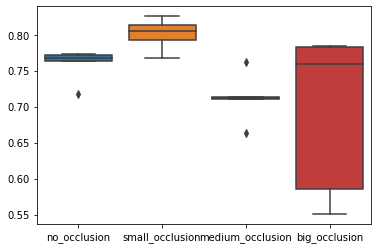

In [278]:
import seaborn as sns

#prepare df
boxplot_df = pd.DataFrame(columns = ["no_occlusion", "small_occlusion", "medium_occlusion", "big_occlusion"])
boxplot_df["no_occlusion"] = stds["no_occlusion"]
boxplot_df["small_occlusion"] = stds["small_occlusion"]
boxplot_df["medium_occlusion"] = stds["medium_occlusion"] + [np.mean(np.array(stds["medium_occlusion"]))]
boxplot_df["big_occlusion"] = stds["big_occlusion"]

boxplot_df
sns.boxplot(data = boxplot_df)

In [228]:
# interpolate

def interpolate_trajectories(trajectories, length):
    
    """
    trajectories is iterable of 3D trajectories as pd.dfs
    length is the desired length of the trajectories after interpolation
    """
    
    # initialize x
    x = np.linspace(0,1,length)
    
    # initialize list to store trajectories
    interpolated_trajectories = []
    
    # un-elegantly allow for singular inputs
    if isinstance(trajectories, pd.DataFrame):
        trajectories = [trajectories]
    
    for trajectory in trajectories:

        # initialize empty array to store trajectory
        #traj = np.zeros((length, 3))
        traj = pd.DataFrame(columns = trajectory.columns)

        #for i in range(trajectory.shape[1]):

        #    f = interp1d(np.linspace(0,1,trajectory.shape[0]), data2[i], kind = 'cubic')
        #    traj[:,i] = f(x)

        for column in trajectory.columns:

            f = interp1d(np.linspace(0,1,trajectory.shape[0]), trajectory[column], kind = 'cubic')
            traj[column] = f(x)

        interpolated_trajectories.append(traj)
    
    return interpolated_trajectories

# test
"""
data = pd.DataFrame()
data2 = pd.DataFrame()

x1 = np.linspace(0, 500, 500)
data['y'] = np.sin(x/100)
data['x'] = x
data['z'] = -4*x

x2 = np.linspace(0, 500, 200)

data2['y'] = np.sin(x2/100 + np.pi)
data2['x'] = x2
data2['z'] = -4*x2

data1_, data2_ = interpolate_trajectories([data, data2], 1000)

#data1_ = pd.DataFrame(data1_, columns = ['y','x','z'])
#data2_ = pd.DataFrame(data2_, columns = ['y','x','z'])


mean = mean_trajectory([data1_, data2_ ])


ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(data1_.x, data1_.y, data1_.z, 'gray')
ax.plot3D(data2_.x, data2_.y, data2_.z, 'green')
#ax.plot3D(mean.x, mean.y, mean.z, 'red')
"""

test_traj = all_trials_grouped[1][1][0].iloc[:,:3]
test_traj = all_trials_grouped[1][1][0].iloc[:,3:6]

interpolate_trajectories(test_traj, 1000)


[       x_left    y_left    z_left
 0   -0.054428  0.721227  0.217002
 1   -0.056048  0.721359  0.217002
 2   -0.057579  0.721231  0.216920
 3   -0.059061  0.720957  0.216774
 4   -0.060533  0.720653  0.216581
 ..        ...       ...       ...
 995  1.053548  0.754073 -0.113714
 996  1.045842  0.757617 -0.115704
 997  0.964504  0.776468 -0.120365
 998  0.764691  0.819422 -0.128838
 999  0.401560  0.895277 -0.142264
 
 [1000 rows x 3 columns]]

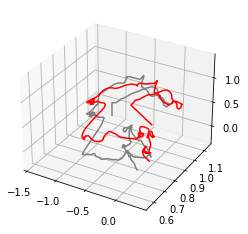

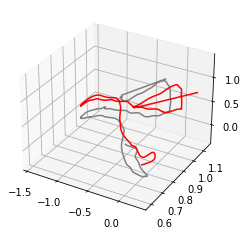

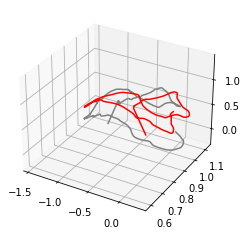

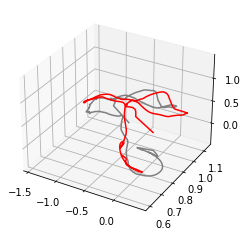

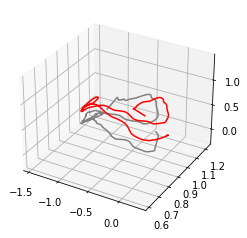

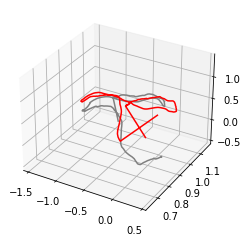

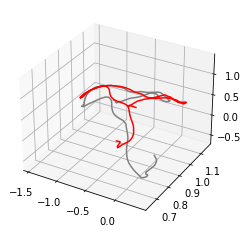

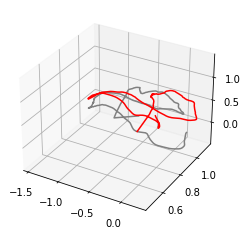

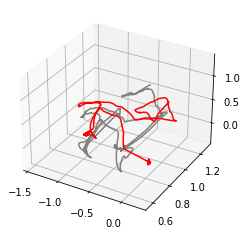

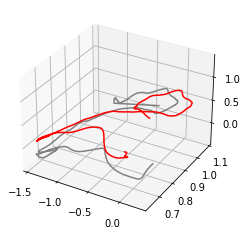

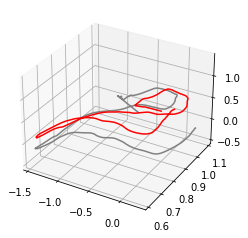

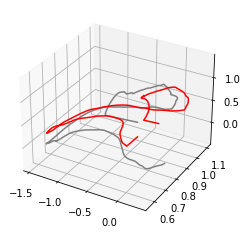

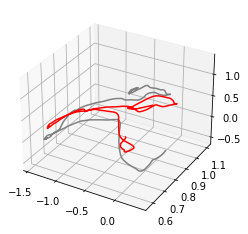

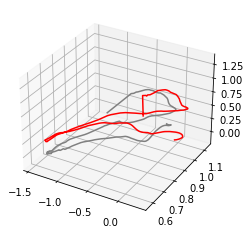

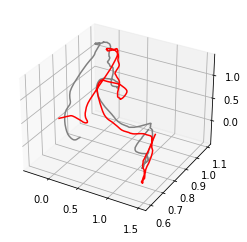

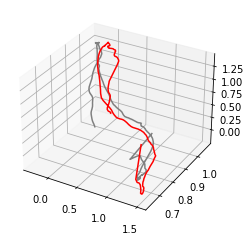

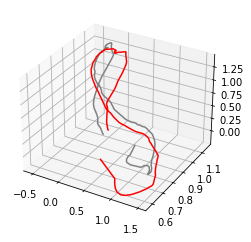

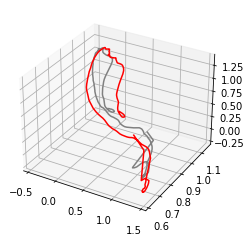

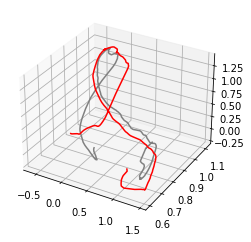

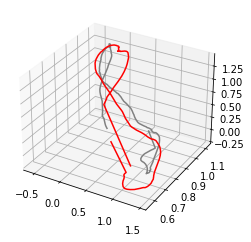

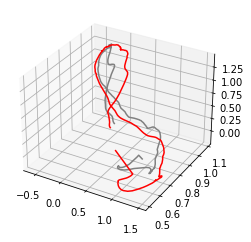

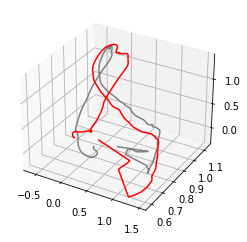

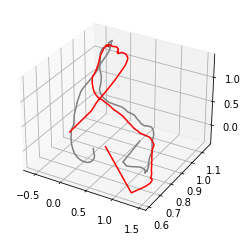

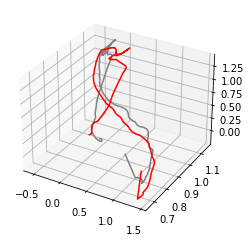

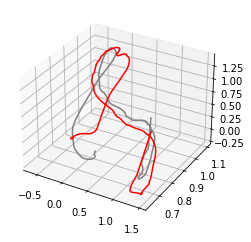

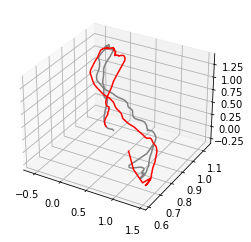

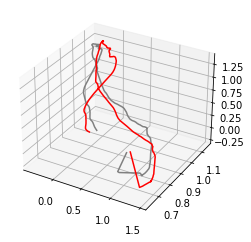

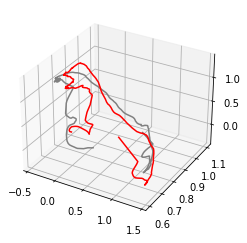

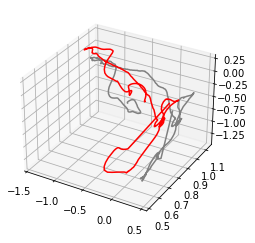

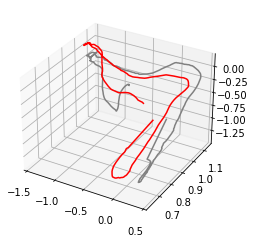

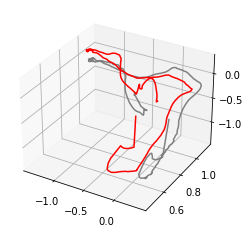

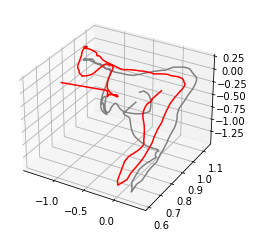

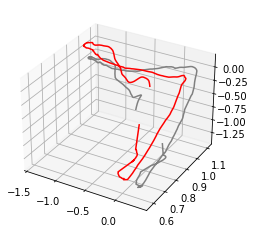

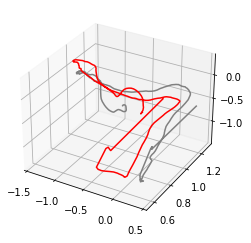

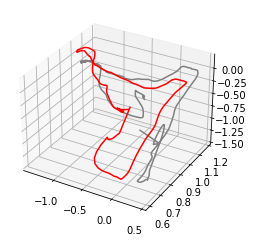

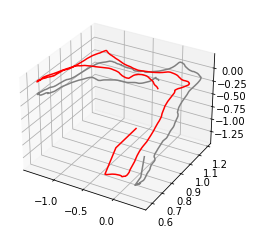

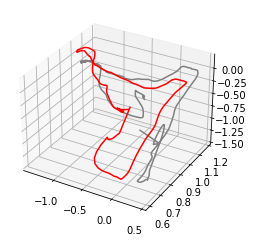

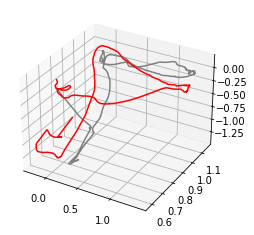

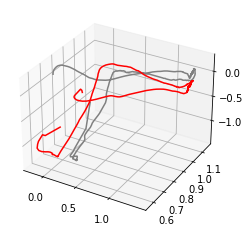

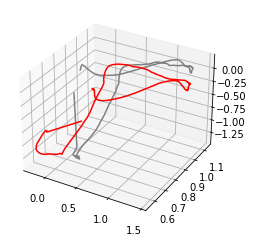

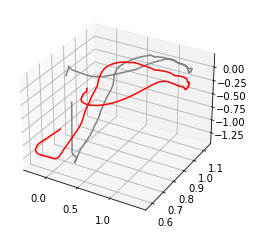

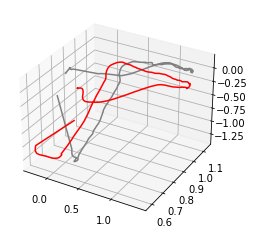

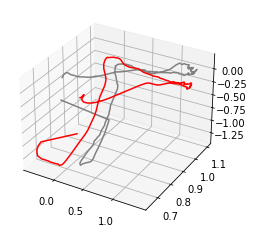

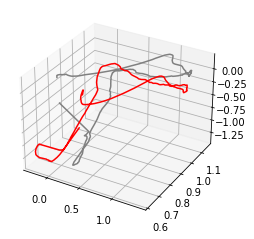

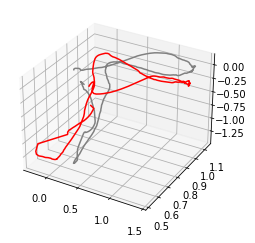

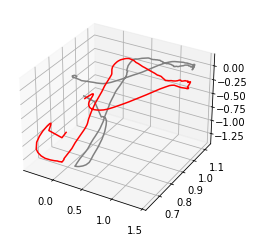

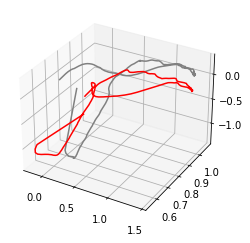

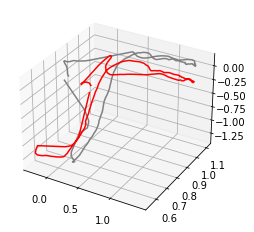

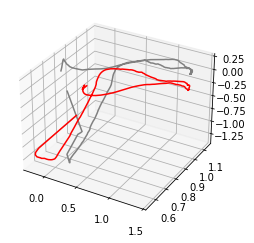

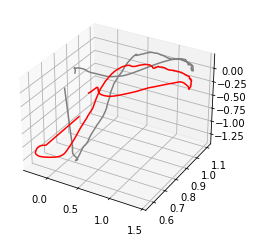

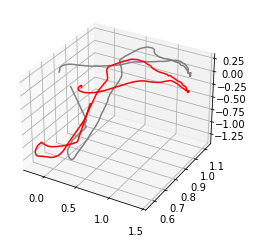

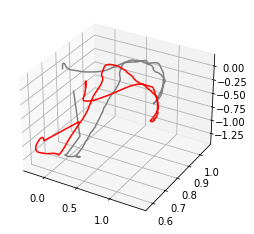

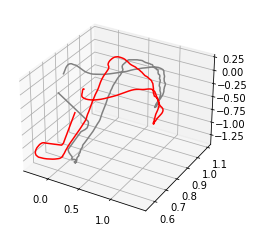

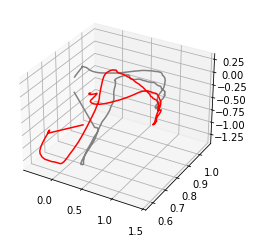

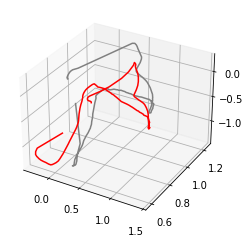

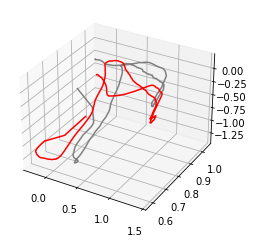

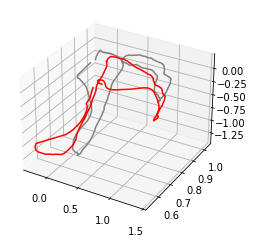

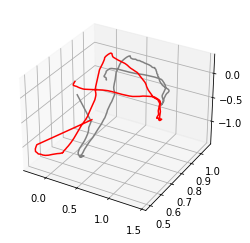

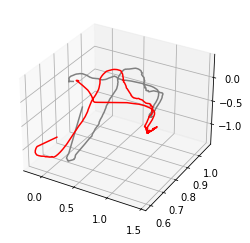

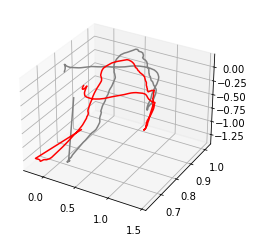

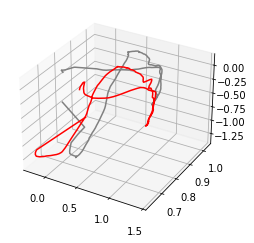

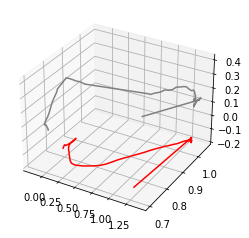

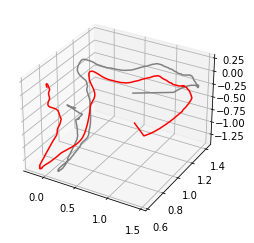

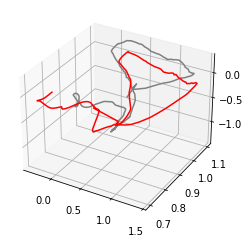

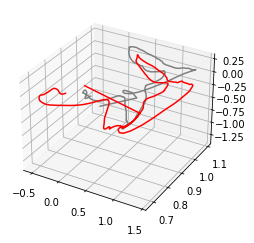

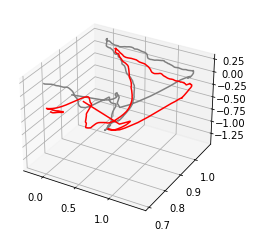

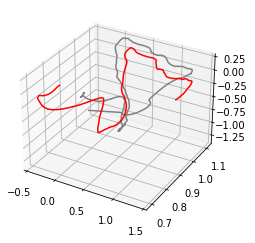

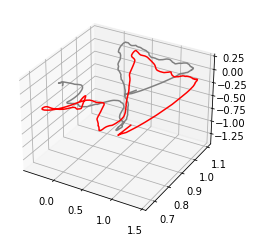

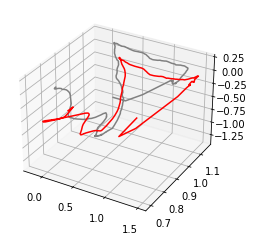

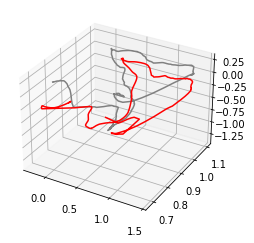

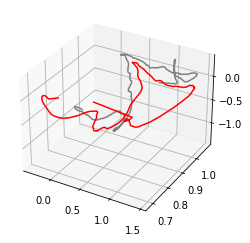

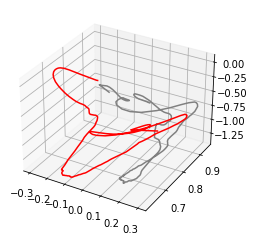

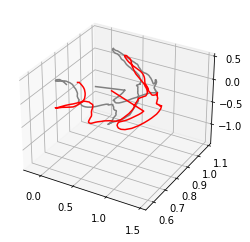

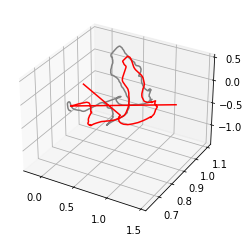

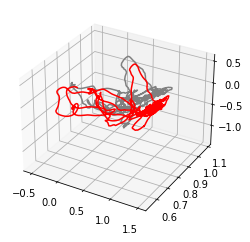

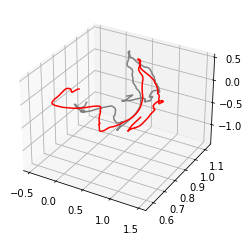

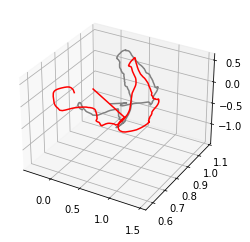

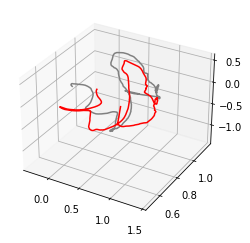

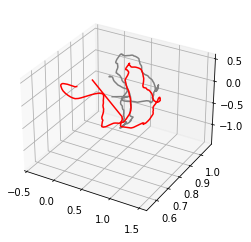

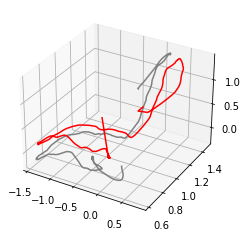

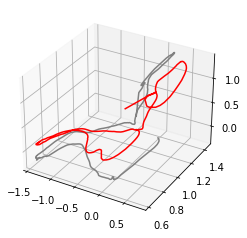

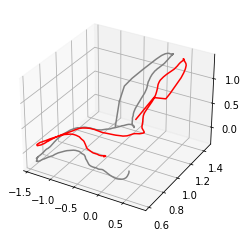

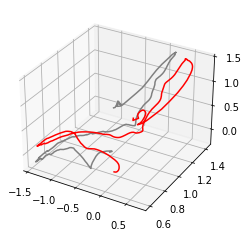

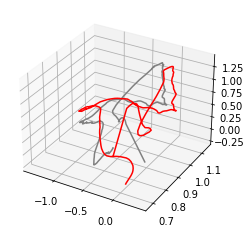

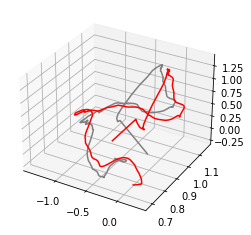

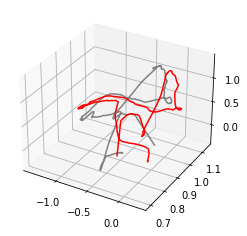

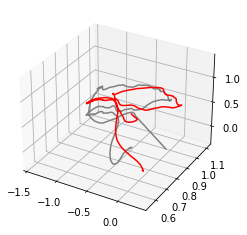

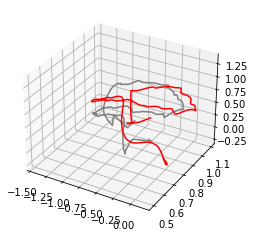

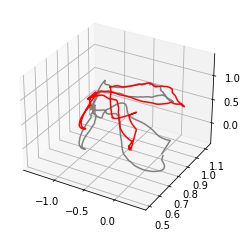

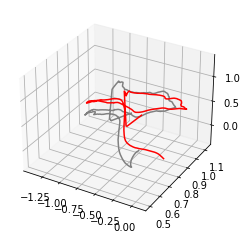

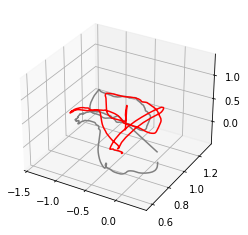

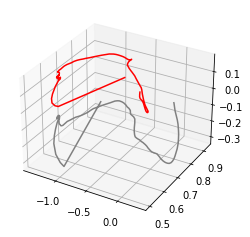

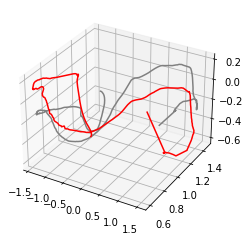

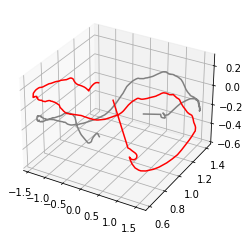

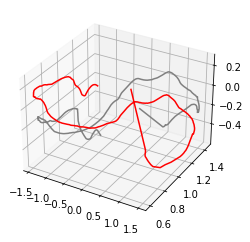

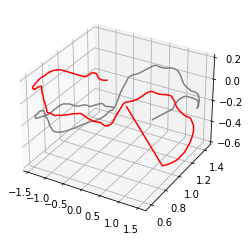

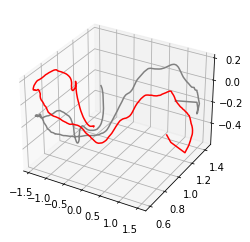

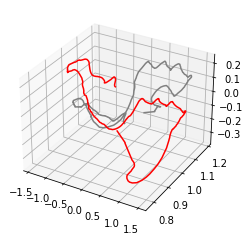

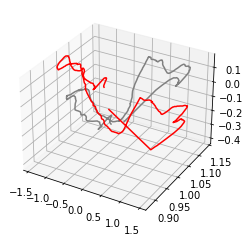

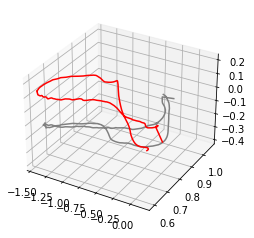

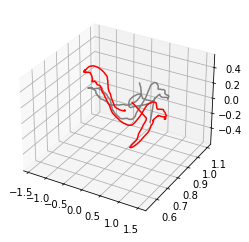

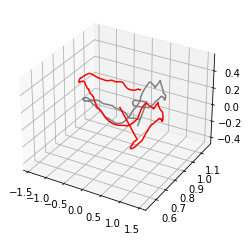

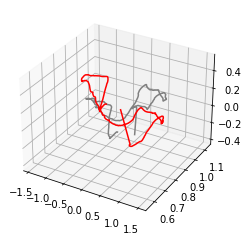

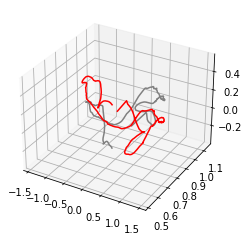

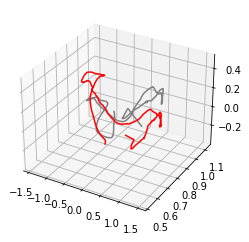

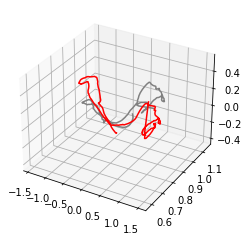

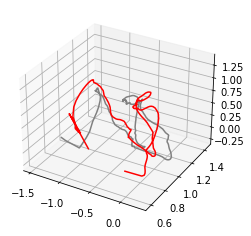

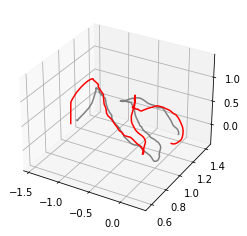

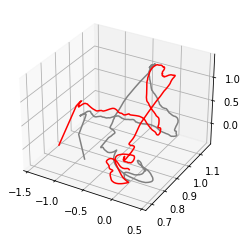

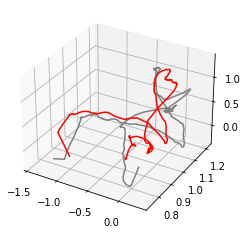

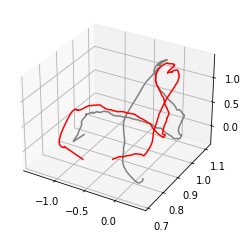

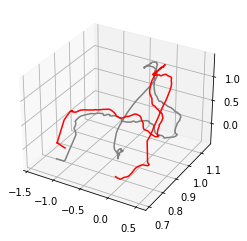

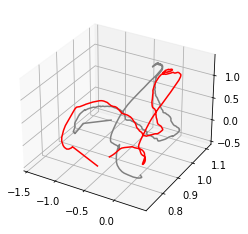

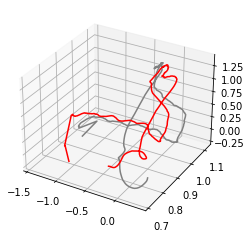

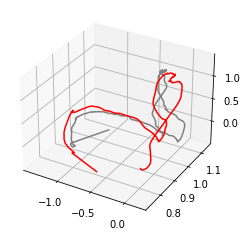

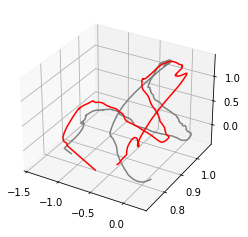

In [205]:
len(all_trials_grouped[5])
for block in all_trials_grouped:
    for group in block:
        plot_trajectories(group)

In [144]:
all_groups = [block1_groups, block2_groups, block3_groups, block4_groups, block5_groups, block6_groups, block7_groups, block8_groups]

for i, (block, groups) in enumerate(zip(blocks, all_groups)):
    print(i, block, groups)


0           # VPN   Block   Trial  TrialType   Zeitdruck  TrailDuration  \
0      Pilot8_2       1       0       None       False       0,000000   
1      Pilot8_2       1       0       None       False       0,000000   
2      Pilot8_2       1       0       None       False       0,000000   
3      Pilot8_2       1       0       None       False       0,000000   
4      Pilot8_2       1       0       None       False       0,000000   
...         ...     ...     ...        ...         ...            ...   
12052  Pilot8_2       1       0       None       False       0,000000   
12053  Pilot8_2       1       0       None       False       0,000000   
12054  Pilot8_2       1       0       None       False       0,000000   
12055  Pilot8_2       1       0       None       False       0,000000   
12056  Pilot8_2       1       0       None       False       0,000000   

       Zielregal  Distance(Cube_center, Perfect_Position)  \
0           None                                -1,000000   